In [360]:
import sklearn.svm as svm
import sklearn
from sklearn import metrics
import numpy as np
import pandas as pd
import tushare as ts 
f = 'data\dataset.csv'
data = pd.read_csv(f).iloc[57:104,:]
date = np.sort(list(set(data['日期_Date'])))
data = data.drop(columns=[ '信息发布日期_Infopubdt',
       '截止日期_Enddt', '报表类型_Reporttype'])
data.dropna()
data.head()
data.index= data['日期_Date']

In [361]:
data.columns

Index(['股票代码_Stkcd', '最新股票名称_Lstknm', '证监会行业门类代码_Csrciccd1', '日期_Date',
       '收盘价_ClPr', '成交量_Trdvol', '成交金额_Trdsum', '总股数月换手率(%)_MonFulTurnR',
       '流通股月换手率(%)_MonTrdTurnR', '总股数平均日换手率(%)_AvgDFulTurnR',
       '流通股平均日换手率(%)_AvgDtrdTurnR', '公司国有股_Comstateshr', '公司法人股_Comlpshr',
       '总股数_Fullshr', '流通股_Trdshr', '已上市流通股_Lsttrdshr', '累积股价调整乘子_Mcfacpr',
       '等权平均市场月收益率_Mreteq', '流通市值加权平均市场月收益率_Mrettmv', '月无风险收益率_Monrfret',
       '市盈率_PE', '市净率_PB', '市现率_PCF', '市销率_PS', '每股收益(摊薄)(元/股)_EPS',
       '净资产收益率(摊薄)_ROE', '每股公积金(元/股)_AccumFundPS', '每股营业利润(元/股)_OpPrfPS',
       '每股净资产(元/股)_NAPS', '调整后每股净资产(元/股)_NAPSadj', '每股营业收入(元/股)_IncomePS',
       '每股经营活动现金流量净额(元/股)_NCFfropePS', 'label'],
      dtype='object')

In [362]:
for i in data.columns[4:-1]:
    data[i] = (data[i]-data[i].min())/(data[i].max()-data[i].min())
data.replace(np.nan,0,inplace=True)

In [363]:
data.info

科A                   K  2016-12-30   
2017-01-26           2           万科A                   K  2017-01-26   
2017-02-28           2           万科A                   K  2017-02-28   
2017-03-31           2           万科A                   K  2017-03-31   
2017-04-28           2           万科A                   K  2017-04-28   
2017-05-31           2           万科A                   K  2017-05-31   
2017-06-30           2           万科A                   K  2017-06-30   
2017-07-31           2           万科A                   K  2017-07-31   
2017-08-31           2           万科A                   K  2017-08-31   
2017-09-29           2           万科A                   K  2017-09-29   
2017-10-31           2           万科A                   K  2017-10-31   
2017-11-30           2           万科A                   K  2017-11-30   
2017-12-29           2           万科A                   K  2017-12-29   
2018-01-31           2           万科A                   K  2018-01-31   
2018-02-28           2    

In [364]:
import pandas as pd 
import numpy as np 
from sklearn.svm import SVC 
from sklearn import metrics 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
train_data = data.copy()
Y_train = train_data.pop('label')
X_train = train_data.drop(['股票代码_Stkcd','最新股票名称_Lstknm','证监会行业门类代码_Csrciccd1','日期_Date'] , axis = 1)  # 去除不相关列
C_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
gamma_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid = dict(gamma=gamma_range,C=C_range)
cv = StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=42) # 打乱
grid = GridSearchCV(SVC(),param_grid=param_grid,cv=cv)
grid.fit(X_train,Y_train)
print("The best parameters are %s with a score of %f " %(grid.best_params_,grid.best_score_)) 

The best parameters are {'C': 1000.0, 'gamma': 0.01} with a score of 0.700000 


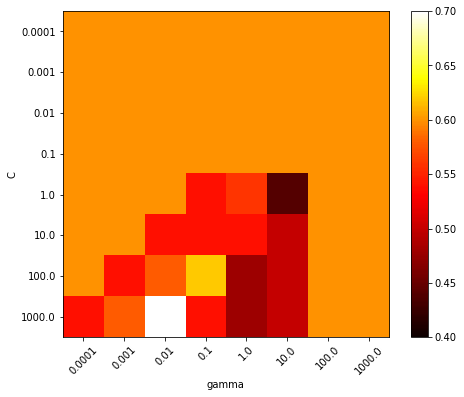

In [365]:
scores=grid.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
import matplotlib.pyplot as plt 
from matplotlib.colors import Normalize 
class MidpointNormalize(Normalize):
    def __init__(self,vmin=None,vmax=None,midpoint=None,clip=False):
         self.midpoint = midpoint 
         Normalize.__init__(self,vmin,vmax,clip)
    def __call__(self,value,clip=None):
         X,Y=[self.vmin,self.midpoint,self.vmax],[0,0.5,1]
         return np.ma.masked_array(np.interp(value,X,Y))
plt.figure(figsize=(8,6))
plt.imshow(scores,interpolation='nearest',cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.4,midpoint=0.58)) 
plt.xlabel('gamma') 
plt.ylabel('C')  
plt.colorbar() 
plt.xticks(np.arange(len(gamma_range)),gamma_range,rotation=45)
plt.yticks(np.arange(len(C_range)),C_range)
plt.show()

In [354]:
train_data.head()

,股票代码_Stkcd,最新股票名称_Lstknm,证监会行业门类代码_Csrciccd1,日期_Date,收盘价_ClPr,成交量_Trdvol,成交金额_Trdsum,总股数月换手率(%)_MonFulTurnR,流通股月换手率(%)_MonTrdTurnR,总股数平均日换手率(%)_AvgDFulTurnR,...,市现率_PCF,市销率_PS,每股收益(摊薄)(元/股)_EPS,净资产收益率(摊薄)_ROE,每股公积金(元/股)_AccumFundPS,每股营业利润(元/股)_OpPrfPS,每股净资产(元/股)_NAPS,调整后每股净资产(元/股)_NAPSadj,每股营业收入(元/股)_IncomePS,每股经营活动现金流量净额(元/股)_NCFfropePS
日期_Date,,,,,,,,,,,,,,,,,,,,,
2015-01-30,1,平安银行,J,2015-01-30,0.65375,0.466122,0.425042,0.552858,0.557530,0.583148,...,0.000000,1.000000,0.737226,0.774815,0.897590,0.737705,0.293963,0.0,0.632576,0.398452
2015-02-27,1,平安银行,J,2015-02-27,0.66125,0.122199,0.123746,0.169712,0.178390,0.276111,...,0.000000,1.000000,0.737226,0.774815,0.897590,0.737705,0.293963,0.0,0.632576,0.398452
2015-03-31,1,平安银行,J,2015-03-31,0.88125,0.593716,0.536481,0.695003,0.698190,0.656152,...,0.273259,0.492537,1.000000,1.000000,1.000000,1.000000,0.391076,0.0,0.945076,0.520036
2015-04-30,1,平安银行,J,2015-04-30,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.273259,0.492537,0.094891,0.095975,0.481928,0.038251,0.000000,0.0,0.013258,0.457195
2015-05-29,1,平安银行,J,2015-05-29,0.82750,0.640947,0.621175,0.590598,0.609061,0.623006,...,0.273259,0.492537,0.094891,0.095975,0.379518,0.027322,0.000000,0.0,0.000000,0.457195


In [355]:
test_target.index[40]

IndexError: index 40 is out of bounds for axis 0 with size 2

In [366]:
# sklearn.tree.
# sklearn.neighbors.KNeighborsClassifier()
# linear,poly,rbf
#clf = svm.SVC(kernel='poly',probability=True,gamma = 0.1,C=100)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
a = []
for t in range(10,len(date)-1):
    train_data ,train_target = X_train.iloc[:t,:],Y_train[:t]
    test_data ,test_target = X_train.iloc[t:t+5,:],Y_train[t:t+5]
    clf.fit(train_data,train_target)
    train_est = clf.predict(train_data)
    test_est = clf.predict(test_data)
    print(t)
    acc = metrics.accuracy_score(test_target,test_est)
    print('accuracy_score',acc)
    a.append([X_train.index[t][:7],acc,X_train.ix[t,'收盘价_ClPr']])
    print('confusion_matrix',metrics.confusion_matrix(test_target,test_est)/t)
a = pd.DataFrame(a)

 return getattr(section, self.name)[new_key]
C:\Users\13443\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\13443\Anaconda3\lib\site-packages\pandas\core\indexing.py:947: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
C:\Users\13443\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\

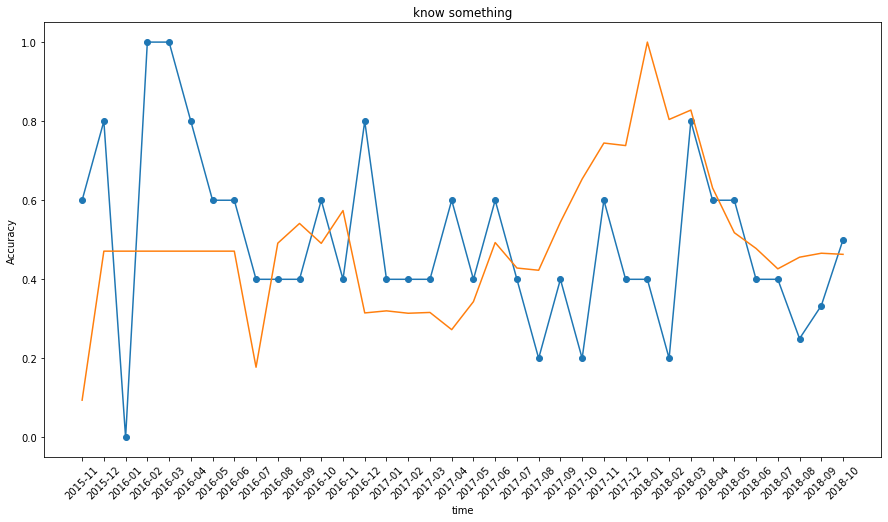

In [367]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
x1 = a.iloc[:,0]

y1 = a.iloc[:,1]
y2 = a.iloc[:,2]
plt.plot(x1, y1, 'o-')
plt.plot(x1, y2, '-')

plt.title('know something')
plt.ylabel('Accuracy')
plt.xlabel('time')
plt.xticks(rotation=45)
plt.show()

In [327]:
# 回测账户
import time
pro = ts.pro_api()
class account:
    def __init__(self,t = 1000000):
        self.t = t    # 账户余额
        self.record = []
    def buy( self , stock ,time = time.localtime(),money):
        for id in stock:
            share = money/stock.value(time)
            self.t -= money
            self.h{'id'} += money/stock[time,'last_price']
            self.record.append([id,time,money,share])
    def sell(self,id,time,money):
        self.t += money
        self.h['id'] -= money/stock[time,'last_price']
    def show(self):
        print("期末余额:",self.t)

SyntaxError: invalid syntax (<ipython-input-327-8890dc5c1555>, line 12)